## Batch Normalization

Note: read accompanying BN concepts notebook first,and then do this project.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0


### Without BN layers


In [23]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [6]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_split=0.10)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 6s 103us/sample - loss: 0.7128 - accuracy: 0.7681 - val_loss: 0.5151 - val_accuracy: 0.8210
Epoch 2/10
54000/54000 [==============================] - 5s 85us/sample - loss: 0.4901 - accuracy: 0.8299 - val_loss: 0.4510 - val_accuracy: 0.8390
Epoch 3/10
54000/54000 [==============================] - 5s 88us/sample - loss: 0.4465 - accuracy: 0.8435 - val_loss: 0.4824 - val_accuracy: 0.8350
Epoch 4/10
54000/54000 [==============================] - 5s 92us/sample - loss: 0.4185 - accuracy: 0.8533 - val_loss: 0.4423 - val_accuracy: 0.8462
Epoch 5/10
54000/54000 [==============================] - 5s 87us/sample - loss: 0.3985 - accuracy: 0.8600 - val_loss: 0.4351 - val_accuracy: 0.8508
Epoch 6/10
54000/54000 [==============================] - 5s 88us/sample - loss: 0.3823 - accuracy: 0.8661 - val_loss: 0.4146 - val_accuracy: 0.8500
Epoch 7/10
54000/54000 [==============================] 

(0, 1)

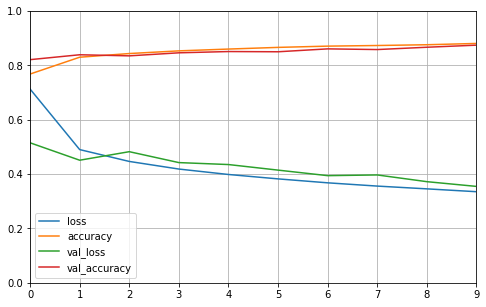

In [7]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)


### With BN Before Activation Layer (original proposal)

Sometimes applying BN before the activation function works better (there's a debate on this topic). Moreover, the layer before a `BatchNormalization` layer does not need to have bias terms, since the `BatchNormalization` layer has same as well in the form of **beta**, it would be a waste of parameters, so you can set `use_bias=False` when creating those layers:

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30000     
_________________________________________________________________
activation_1 (Activation)    (None, 100)              

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [11]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_split=0.10)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 9s 160us/sample - loss: 0.8690 - accuracy: 0.7140 - val_loss: 0.5726 - val_accuracy: 0.8070
Epoch 2/10
54000/54000 [==============================] - 7s 138us/sample - loss: 0.5756 - accuracy: 0.8040 - val_loss: 0.4854 - val_accuracy: 0.8295
Epoch 3/10
54000/54000 [==============================] - 8s 142us/sample - loss: 0.5148 - accuracy: 0.8223 - val_loss: 0.4449 - val_accuracy: 0.8438
Epoch 4/10
54000/54000 [==============================] - 8s 144us/sample - loss: 0.4759 - accuracy: 0.8349 - val_loss: 0.4224 - val_accuracy: 0.8498
Epoch 5/10
54000/54000 [==============================] - 8s 145us/sample - loss: 0.4507 - accuracy: 0.8418 - val_loss: 0.4066 - val_accuracy: 0.8567
Epoch 6/10
54000/54000 [==============================] - 8s 149us/sample - loss: 0.4336 - accuracy: 0.8490 - val_loss: 0.3923 - val_accuracy: 0.8642
Epoch 7/10
54000/54000 [===========================

(0, 1)

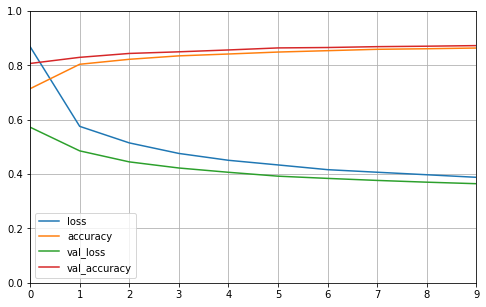

In [12]:


pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)


### With BN After Activation Layer

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
activation_3 (Activation)    (None, 100)              

In [15]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization_3/gamma:0', True),
 ('batch_normalization_3/beta:0', True),
 ('batch_normalization_3/moving_mean:0', False),
 ('batch_normalization_3/moving_variance:0', False)]

In [16]:
bn1.updates

[<tf.Operation 'cond/Identity' type=Identity>,
 <tf.Operation 'cond_1/Identity' type=Identity>]

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [18]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_split=0.10)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 9s 160us/sample - loss: 0.8658 - accuracy: 0.7118 - val_loss: 0.5721 - val_accuracy: 0.8015
Epoch 2/10
54000/54000 [==============================] - 8s 140us/sample - loss: 0.5760 - accuracy: 0.8022 - val_loss: 0.4934 - val_accuracy: 0.8233
Epoch 3/10
54000/54000 [==============================] - 8s 143us/sample - loss: 0.5171 - accuracy: 0.8197 - val_loss: 0.4572 - val_accuracy: 0.8340
Epoch 4/10
54000/54000 [==============================] - 8s 146us/sample - loss: 0.4806 - accuracy: 0.8316 - val_loss: 0.4334 - val_accuracy: 0.8453
Epoch 5/10
54000/54000 [==============================] - 8s 148us/sample - loss: 0.4585 - accuracy: 0.8404 - val_loss: 0.4157 - val_accuracy: 0.8522
Epoch 6/10
54000/54000 [==============================] - 8s 148us/sample - loss: 0.4391 - accuracy: 0.8460 - val_loss: 0.4052 - val_accuracy: 0.8517
Epoch 7/10
54000/54000 [===========================

(0, 1)

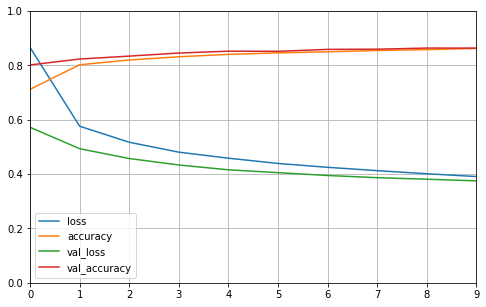

In [19]:


pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)


**conclusion:** If you don't see improvements in accuracy with BN , don't be panic, as that is not the primary goal of BN.
- First: BN is meant for DNNs and not for shallow nets like above.
- Second: BN's primary goal is to improve speed of training and eliminate the unstable gradients,vanishing gradients and exploding gradients problem.
- Third:  BN allows you not to worry too much in choosing the activation function , initialization method and learning rate.